In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Activation
from tensorflow.keras import backend as K

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 4.2 *Autoencoder*

Autoencoder adalah Jaringan Saraf yang dilatih dengan tujuan untuk mengkopi input menjadi output. Jaringan Autoencoder terdiri dari dua bagian: Encoder dan Decoder. Awalnya, Autoencoder digunakan untuk melakukan reduksi dimensi atau *feature learning* yang untuk beberapa kasus berhasil mereduksi dimensi lebih baik daripada PCA.
![autoencoder](https://blog.keras.io/img/ae/autoencoder_schema.jpg)
Kali ini kita juga akan gunakan dataset Fashion MNIST langsung dari dataset tensorflow. Maka load kembali dataset

Gambar: blog.keras.io 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
num_class = 10

Setelah kita unduh dataset, mari kita coba tampilkan tampilan salah satu data

y = 0 T-shirt/top


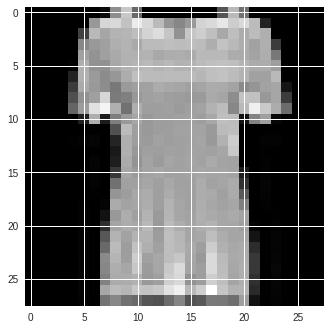

In [4]:
img_index = 10
label_index = int(y_train[img_index])
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index].astype(np.uint8), cmap='gray')

Kemudian kita lakukan preprocessing terhadap data untuk meratakan data.

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

n_input = x_train.shape[1]

(60000, 784)
(10000, 784)


Untuk membuat suatu jaringan Autoencoder, maka kita gunakan sebuah layer Dense dengan input ukuran data dan output ukuran reduksi dimesi.

Setelah itu kita tumpuk dengan sebuah layer Dense lagi yang menerima input berukuran hasil reduksi dimensi dan output kembali ke ukuran data.

In [6]:
encoding_dim = 100 

input_img = Input(shape=(n_input,))

encoded = Dense(encoding_dim, activation='sigmoid')(input_img)  # layer 1

decoded = Dense(n_input, activation='sigmoid')(encoded)         # layer 2

# satukan model
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


Mari kita coba melatih jaringan dengan 30 epoch

In [7]:

autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4248 - val_loss: 0.3661
Epoch 2/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3432 - val_loss: 0.3310
Epoch 3/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3223 - val_loss: 0.3198
Epoch 4/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3127 - val_loss: 0.3130
Epoch 5/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3068 - val_loss: 0.3077
Epoch 6/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3028 - val_loss: 0.3030
Epoch 7/30
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2996 - val_loss: 0.3021
Epoch 8/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2972 - val_loss: 0.2989
Epoch 9/30
60000/60000 [======================

Untuk melakukan prediksi, maka mari kita buat model Encoder dan Decoder yang masing-masing merupakan setengah dari model yang sudah dilatih

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

Mari kita coba untuk meng-encode data test dan kemudian mencoba merekonstruksi kembali hasil encode tersebut

In [10]:
x_test[0].reshape(1,784).shape

(1, 784)

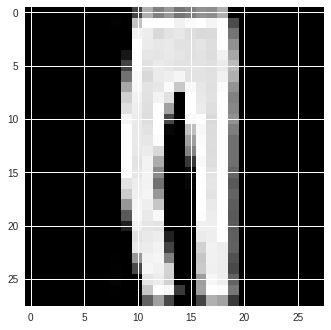

In [26]:
plt.imshow(x_test[2].reshape(28,28))
plt.gray()

In [27]:

encoded_imgs3 = encoder.predict(x_test[2].reshape(1,784))
encoded_imgs3.shape

(1, 100)

In [13]:
print(encoded_imgs)


[[0.23176697 1.         0.70092046 1.         0.74208164 0.51773655
  1.         0.7675898  1.         0.         0.25524664 0.2945372
  0.8814115  0.42557493 0.6521414  0.60183764 0.25947022 0.9491276
  1.         0.08772746 0.04162839 1.         0.64211315 1.
  1.         0.6509787  1.         0.40199846 0.87097836 0.97593987
  0.8598094  1.         0.8849718  1.         0.84758174 1.
  1.         0.2689914  0.34606206 1.         0.00325301 0.80702955
  0.61672467 1.         1.         1.         0.1932103  0.8388027
  0.4607103  0.03403223 1.         0.830407   0.85318017 0.4157274
  0.64794064 1.         0.46256745 0.52593434 0.72789526 1.
  1.         0.8226894  0.8004534  0.2538728  0.6972207  0.25499737
  1.         0.1701043  1.         1.         0.7943796  1.
  1.         1.         0.24666896 0.6664359  1.         1.
  0.8975557  0.6407211  1.         0.06901151 0.7101618  1.
  0.04914373 0.06734347 0.2010929  0.2349563  1.         0.45344776
  1.         0.73543715 0.939286

In [0]:
decoded_imgs = decoder.predict(encoded_imgs3)

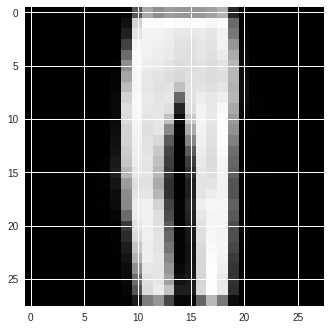

In [29]:
plt.imshow(decoded_imgs.reshape(28,28))
plt.gray()

In [0]:
encoded_imgs2 = encoded_imgs-encoded_imgs3

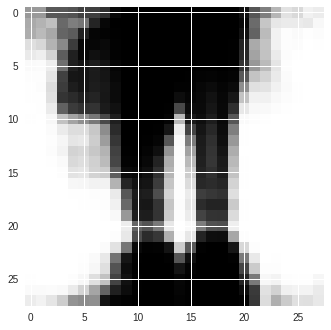

In [32]:
decoded_imgs2 = decoder.predict(encoded_imgs2)
plt.imshow(decoded_imgs2.reshape(28,28))
plt.gray()

In [16]:
ran = np.random.randint(0,10,(1,100))/10
ran

array([[0. , 0.4, 0.1, 0.1, 0.5, 0.5, 0.2, 0.7, 0. , 0.1, 0.4, 0. , 0.8,
        0.6, 0.7, 0.2, 0.9, 0.8, 0.7, 0.3, 0.3, 0.1, 0.7, 0.2, 0.3, 0.6,
        0. , 0.8, 0.1, 0.1, 0.9, 0.1, 0.3, 0.5, 0.3, 0.6, 0.9, 0.3, 0.1,
        0.3, 0.6, 0.8, 0.4, 0.9, 0. , 0.1, 0.1, 0.1, 0.4, 0.8, 0.3, 0.1,
        0.4, 0. , 0.4, 0.6, 0.2, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.6, 0.6,
        0.4, 0.3, 0. , 0.2, 0.1, 0.3, 0.1, 0.9, 0. , 0.8, 0.1, 0.6, 0.5,
        0.3, 0.6, 0.8, 0.3, 0.6, 0.7, 0. , 0.3, 0.9, 0.7, 0.9, 0.1, 0.2,
        0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.5, 0.5, 0.2]])

In [0]:

decoded_imgs = decoder.predict(ran)

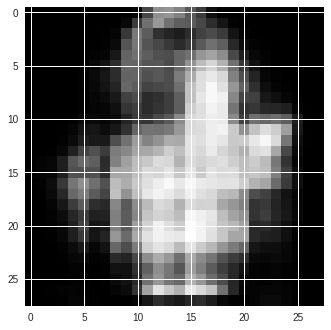

In [18]:
plt.imshow(decoded_imgs.reshape(28,28))
plt.gray()

IndexError: ignored

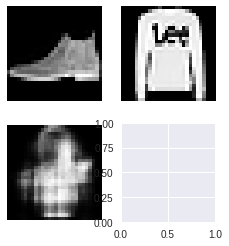

In [19]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Konsep dari *layer-wise pretrain model* adalah dengan membuat jaringan baru lagi yang menerima input hasil reduksi dimensi, dan dilatih untuk mereduksi dimensi lebih jauh.

Untuk itu kita bangung model autoencoder kedua sebagai berikut

In [0]:
encoding_dim2 = 200

input_img2 = Input(shape=(encoding_dim,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(encoding_dim, activation='sigmoid')(encoded2)

autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='rmsprop', loss='binary_crossentropy')

Setelah itu, mari kita latih autoencoder kedua dengan data hasil reduksi dimensi autoencoder pertama

In [0]:
x_train2 = encoder.predict(x_train)
autoencoder2.fit(x_train2, x_train2,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(encoded_imgs, encoded_imgs))

Kemudian kita juga bangun model encoder dan decoder dari potongan autoencoder kedua

In [0]:
encoder2 = Model(input_img2, encoded2)

encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))

Mari kita coba kedua autoencoder kita jika digunakan untuk merekonstruksi data test

In [0]:
encoded_imgs = encoder.predict(x_test)
encoded_imgs2 = encoder2.predict(encoded_imgs)
decoded_imgs2 = decoder2.predict(encoded_imgs2)
decoded_imgs = decoder.predict(decoded_imgs2)


decoded_imgs_1 = decoder.predict(encoded_imgs)

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many image we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display first reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_1[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display second reconstruction
    ax = plt.subplot(3, n, i + 1 + n+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
autoencoder.summary()
autoencoder2.summary()

Sekarang jika kita ingin menggunakan bobot hasil pelatihan kedua autoencoder, maka kita bangun model baru yang menggunakan kedua encoder dari autoencoder yang telah dilatih.

Mari kita lihat bagaimana performanya setelah hanya 20 epoch

In [0]:
inputs2 = Input(shape=(n_input,))
x = encoder(inputs2)
x = encoder2(x)
outputs2 = Dense(num_class, activation='softmax')(x)

pretrain = Model(inputs2, outputs2)
pretrain.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

pretrain.fit(x_train, y_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test))

Kini, mari kita bandingkan dengan Jaringan biasa, dengan 2 layer juga, namun dengan inisialisasi bobot yang random

In [0]:

inputs = Input(shape=(n_input,))
x = Dense(500, activation='sigmoid')(inputs)
x = Dense(200, activation='sigmoid')(x)
outputs = Dense(num_class, activation='softmax')(x)

shallow = Model(inputs, outputs)
shallow.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

shallow.fit(x_train, y_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test))

In [0]:
print('shallow summary')
shallow.summary()
print()
print('pretrain summary')
pretrain.summary()

In [0]:

y_pretrain = np.argmax(pretrain.predict(x_test),axis=1)
y_shallow = np.argmax(shallow.predict(x_test),axis=1)


print('Layer-wise Pretrain Performance')
print('Confusion Matrix')
print(confusion_matrix(np.argmax(y_test,axis=1), y_pretrain))
print()

print('Accuracy =', accuracy_score(np.argmax(y_test,axis=1), y_pretrain))
print()

print('Shallow Performance')
print('Confusion Matrix')
print(confusion_matrix(np.argmax(y_test,axis=1), y_shallow))
print()

print('Accuracy =', accuracy_score(np.argmax(y_test,axis=1), y_shallow))
print()



Dapat dilihat bahwa jaringan yang sama yang dilatih dengan bobot hasil pretraining dapat menghasilkan akurasi lebih baik hanya dalam 20 epoch

### 4.3 *New Weight Initializations*

Perkembangan kedua yang menyebabkan Jaringan Saraf tiruan berhasil adalah dengan diperkenalkannya cara inisialisasi bobot baru seperti Xavier Initialization atau Glorot Initialization yang diperkenalkan oleh Glorot et al

Dengan cara yang sama dengan sebelumnya, mari kita lihat efek inisialisasi bobot dengan Xavier Initialization pada jaringan 10 neuron berikut

In [0]:
act = {'tanh': lambda x: np.tanh(x)}

D = np.random.randn(1000, 500)
hid_size = [500] * 10
nonl = ['tanh'] * len(hid_size)

Hs = {}
for i in range(len(hid_size)):
    X = D if i == 0 else Hs[i - 1]
    fan_in = X.shape[1]
    fan_out = hid_size[i]
    W = np.random.randn(fan_in,fan_out) / np.sqrt(fan_in)

    H = np.dot(X, W)
    H = act[nonl[i]](H)
    Hs[i] = H
    

print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print ('hidden layer %d had mean %f and std %f' % (i + 1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

plt.figure(figsize=(15,4))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
plt.show()

Dari hasil di atas dapat dilihat bahwa distribusi hasil aktivasi tiap layer tetap beragam sehingga jaringan dapat terus belajar.

### 4.4 Fungsi Aktivasi Baru

Perkembangan lain yang berkontribusi besar dalam perkembangan Jaringan Saraf Tiruan adalah diperkenalkannya Fungsi Aktivasi baru seperti ***Rectifier Linear Unit*** dan variasinya.

ReLU | Leaky ReLU | ELU
---|---|---
![relu](https://image.ibb.co/dotmAe/relu.png)|![lrelu](https://image.ibb.co/csFoOz/lrelu.png)|![elu](https://image.ibb.co/iB6HGK/elu.png)

Penggunaan Fungsi Aktivasi **ReLU** membuat output aktivasi tidak tertekan ke nilai tertentu sehingga gradien dapat mengalir penuh.

Saat ini, Fungsi Aktivasi **ReLU** sudah menjadi standar yang digunakan pada Jaringan Saraf Tiruan

### 4.5 Fungsi Optimasi Baru
Perkembangan juga dilakukan pada teknik optimasi untuk mengupdate bobot dan learning rate seperti teknik SGD yang ditambahkan ***Momentum***, ***Nesterov***, Optimasi ***RMSProp***, Optimasi ***Adagrad***, hingga Optimasi ***ADAM*** dan variasinya

Saat ini, penggunaan **Adam** sebagai teknik optimasi Jaringan Saraf Tiruan sudah menjadi hal yang umum.

Perbandingan 1 | Perbandingan 2
---|---
![perbandingan1](http://cs231n.github.io/assets/nn3/opt2.gif)|![perbandingan2](http://cs231n.github.io/assets/nn3/opt1.gif)

### 4.6 Penggunaan Teknik-teknik Regularisasi

Perkembangan *Deep Learning* ini ditambahkan dengan hasil penambahan teknik regularisasi dan variasinya seperti ***Dropout***, ***Batchnorm***, dan sebagainya

Dropout | Perbandingan Optimasi menggunakan Dropout
---|---
![dropout](http://cs231n.github.io/assets/nn2/dropout.jpeg) | ![perbandingan3](https://image.ibb.co/ehbyqe/perbandingan3.png)

### 4.6 Data dan Kemampuan Komputasi

Dan tentu saja, perkembangan *Deep Learning* tidak akan maju tanpa diimbangi dengan perkembangan teknologi dan resource. Tanpa data yang cukup, *Deep Learning* tidak bisa belajar dengan baik. Dan perkembangan Internet sangat membantu memperkaya data tersebut. 

Dengan data yang makin besar, resource dan teknologi komputasi harus semakin ditingkatkan agar proses pelatihan dapat berjalan dengan lama waktu yang masih bisa diterima. NVIDIA dan Google memiliki peran penting dalam perkembangan GPU dan TPU yang mempercepat proses perhitungan.

Perbandingan CPU-GPU-TPU | Perbandingan Komputasi NVIDIA
---|---
![perbandingan4](https://storage.googleapis.com/gweb-cloudblog-publish/original_images/tpu-6tlel.PNG)|![](https://icdn3.digitaltrends.com/image/data-center-tesla-v100-inference-performance-chart-297-m2x-720x720.png)

![title](https://image.ibb.co/hjVDoz/footer.png)
